# **ML model for predict Startup Success**

This article moves to the next step: building and refining a model to predict startup success.

Building on our work from 'Analyzing Key Factors That Lead to Successful Startups,' we'll now utilize the data prepared in this new article.
 
Our discussion will cover training this model, find the best model for this case, adjusting its settings for better results, and checking how well it predicts outcomes.

We’ll take a comprehensive look at the crucial process of Model Training with this specific Workflow : 

- Importing essential libraries
- Data Preparation
- Data Segmentation
- Model Training
- Validation
- Hyperparameter Tuning
- Testing 
- Evaluation

Let's start by addressing a crucial question that consistently emerges at the beginning of model implementation:

 ####  **How to select the best machine learning model?**

When trying to select the best model, identifying the specific problem you aim to solve is crucial, as it guides the selection of models suitable for your analysis.  After doing that you can identify if you're tackling a classification, regression, or clustering issue, the choice of model will vary accordingly. 

By preparing your data, training with different models, employing methods such as cross-validation and grid search, and analyzing the outcomes, you can identify the model that works best for you.

In this article, we will try to predict the success of startups (whether they will be acquired or closed). Since the target is binary, we are dealing with a classification problem.

It is generally considered best practice to experiment with various models to identify the most effective one. In my case, I will select Random Forest, Decision Tree, and Boosting models for evaluation.


 ####  **Importing essential libraries**

Let's start by importing all necessary libraries that contain the tools and functions we need for our analysis and model building.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import ensemble
import os

We're advancing our analysis by utilizing the cleaned dataset from our previous article on preprocessing for startup success prediction. 

 ####  **Prepare the Data:** 

In [2]:
notebook_directory = 'notebooks'
file_name = 'cleaned_data.csv'
file_path = os.path.join('..', 'notebooks', 'cleaned_data.csv')
data_df = pd.read_csv(file_path, encoding="ISO-8859-1")

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state_code                  923 non-null    int64  
 1   city                        923 non-null    int64  
 2   age_first_funding_year      923 non-null    float64
 3   age_last_funding_year       923 non-null    float64
 4   age_first_milestone_year    923 non-null    float64
 5   age_last_milestone_year     923 non-null    float64
 6   relationships               923 non-null    int64  
 7   funding_rounds              923 non-null    int64  
 8   funding_total_usd           923 non-null    int64  
 9   milestones                  923 non-null    int64  
 10  category_code               923 non-null    int64  
 11  has_VC                      923 non-null    int64  
 12  has_angel                   923 non-null    int64  
 13  has_roundA                  923 non

Now that we've loaded the data, it's time to divide it into training, validation, and test sets.

####  **Data Segmentation**


Data segmentation is the process where we split the dataset into parts for training and testing the model. It helps the model learn from one part and get tested on another. This step is key for making the model predict well.

Defining inputs and the target variable is crucial as it guides the model on what information to use for predictions and which outcome to forecast. Inputs, also known as features, are the data points the model analyzes, while the target variable is what we're trying to predict. 

In [4]:
inputs= data_df.drop('status', axis=1)  
target = data_df['status']

To split the dataset into parts for training and testing the model we will use the following train_test_split function.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

With test_size=0.2, we use 20% of the data for testing and the rest for training.
random_state=42 makes sure the split is the same every time we run the code.

After splitting our data, let's proceed to the next step: training our model

####  **Train various models:** 

Train various models that are suitable for your problem. Include a mix of simple and complex models (like Decision Trees, Random Forest, Gradient Boosting, SVM, Neural Networks).**

Model training is the transformative process where algorithms learn from data to make predictions, classifications, or decisions.

####  **Cross Validation**


Use k-fold cross-validation to assess the generalizability of your models on unseen data. This helps to mitigate the risk of overfitting to the training set.

In this scenario, we apply cross-validation to three models:

- Random Forest 
- Gradient Boosting 
- Decision Tree Classifier 
  
By utilizing the cross_val_score function, we can evaluate how well each model performs without altering their settings. This approach enables us to identify which model is most effective with our data right from the beginning.

In [6]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

def perform_cross_validation(models, x_train, y_train, kf):
    """
    Perform cross-validation for multiple models.
    
    Args:
    - models (dict): A dictionary where keys are model names and values are model instances.
    - x_train (array-like): Training features.
    - y_train (array-like): Training labels.
    - kf: Cross-validation strategy.
    
    Returns:
    - results (dict): A dictionary containing the average accuracy scores for each model.
    """
    results = {}
    for model_name, model in models.items():
        scores = cross_val_score(model, x_train, y_train, cv=kf, scoring="accuracy")
        average_score = scores.mean()
        results[model_name] = average_score
        print(f'Model: {model_name}')
        print(f'Scores for each fold: {scores}')
        print(f'Average score: {average_score:.2f}\n')
    return results

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Define KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
results = perform_cross_validation(models, x_train, y_train, kf)


Model: Decision Tree
Scores for each fold: [0.74324324 0.66216216 0.72972973 0.76190476 0.72108844]
Average score: 0.72

Model: Gradient Boosting
Scores for each fold: [0.84459459 0.75675676 0.77027027 0.78231293 0.85034014]
Average score: 0.80

Model: Random Forest
Scores for each fold: [0.85810811 0.77027027 0.79054054 0.78911565 0.88435374]
Average score: 0.82



Based on the scores from each fold, it's clear that the Random Forest model performs the best with an average score of 0.81.

The higher average score of the Random Forest model suggests it is more effective at predicting startup success in our scenario. To further improve its performance, we plan to optimize the model's parameters.

####  **Optimizing hyperparameters with SearchGridCV** ###

Optimizing hyperparameters with GridSearchCV refers to a technique used in machine learning to find the best combination of hyperparameters for a given model. 

Optimizing parameters for all three models Decision Tree, Gradient Boosting, and Random Forest is crucial despite the initial performance differences. This step is important because it allows us to maximize each model's predictive capabilities by fine tuning how they learn from the data. 

Even if the Random Forest model currently shows the best performance, optimizing the Decision Tree and Gradient Boosting models could uncover potential improvements that weren't initially apparent. Parameter optimization can adjust for overfitting or underfitting, enhance model accuracy, and ensure that each model operates at its most efficient. 

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

def perform_grid_search(models, x_train, y_train, kf):
    """
    Perform GridSearchCV for multiple models.
    
    Args:
    - models (dict): A dictionary where keys are model names and values are tuples containing model instances
                     and corresponding parameter grids.
    - x_train (array-like): Training features.
    - y_train (array-like): Training labels.
    - kf: Cross-validation strategy.
    
    Returns:
    - best_models (dict): A dictionary containing the best models for each model name.
    """
    best_models = {}
    for model_name, (model, param_grid) in models.items():
        grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy')
        best_model = grid_search.fit(x_train, y_train)
        best_models[model_name] = best_model
        print(f"{model_name} Best Hyperparameters:", best_model.best_params_)
        print(f"{model_name} Best Accuracy:", best_model.best_score_)
    return best_models

# Define the parameter grids for each model
param_grids = {
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
    }),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
    }),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 10],
        'learning_rate': [0.01, 0.1, 0.5],
    }),
}

# Call the function to perform grid search
best_models = perform_grid_search(param_grids, x_train, y_train, kf)

Random Forest Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}
Random Forest Best Accuracy: 0.8239382239382239
Decision Tree Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10}
Decision Tree Best Accuracy: 0.7547435190292333
Gradient Boosting Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Gradient Boosting Best Accuracy: 0.8144236072807501


After optimizing the hyperparameters for each model, the Random Forest model emerges as the best option with the highest accuracy of approximately 0.82. 

This model benefits from the optimal settings of no maximum depth, a minimum of 10 samples required to split a node, and 150 estimators. 

Lets save the model and its attributtes.

In [8]:
#best_model will hold the trained machine learning model 
#with the optimal hyperparameters identified by GridSearchCV.
# Save the best models and their attributes
best_random_forest_model = best_models['Random Forest'].best_estimator_
random_forest_feature_importances = best_random_forest_model.feature_importances_
feature_names = x_train.columns

Now, let's proceed to a step in our analysis where we will examine the feature importance as determined by our Random Forest model. 

This step involves identifying which factors are most predictive of a startup's success, be it getting acquired or ceasing operations. By analyzing the feature importance, we gain insights into which variables carry the most weight in our model’s decision making process. 

Here is a visual representation of the feature importance as identified by the Random Forest algorithm.

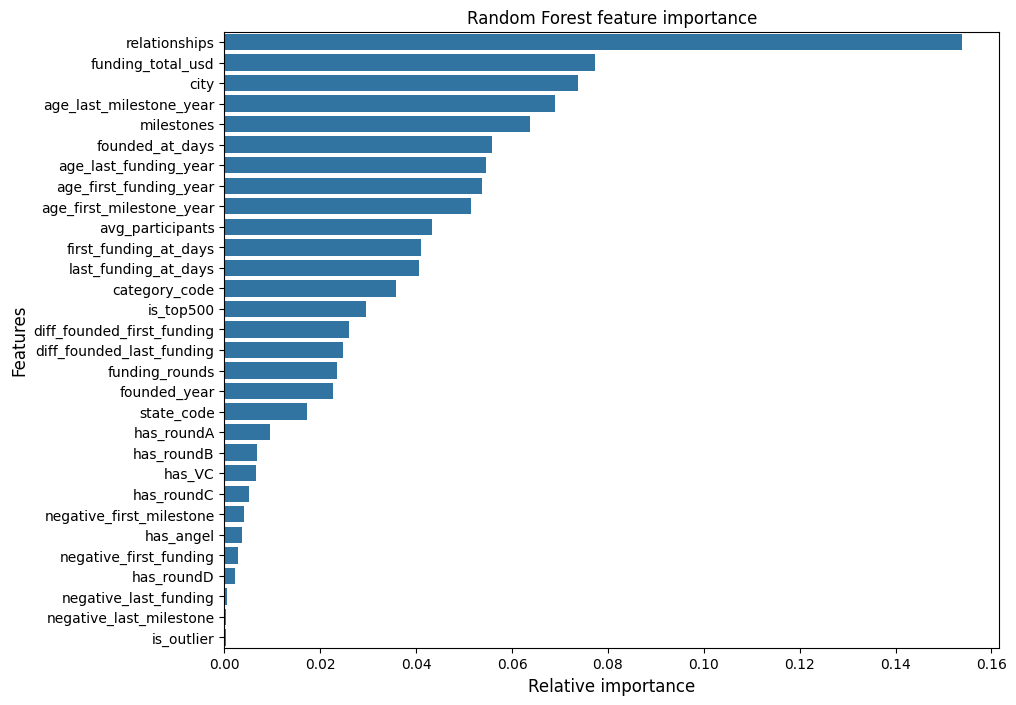

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'best_random_forest_model' is already trained and 'feature_names' is defined
random_forest = best_random_forest_model

# Get feature importances from Random Forest model
indices = np.argsort(random_forest.feature_importances_)[::-1][:40]

# Create a figure for plotting
plt.figure(figsize=(10, 8))

# Create the bar plot for feature importances
sns.barplot(y=np.array(feature_names)[indices][:40], x=random_forest.feature_importances_[indices][:40], orient='h')

# Set the labels and title
plt.xlabel("Relative importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Random Forest feature importance")
plt.show()

The chart suggests that, according to the Random Forest model, the number of relationships (which could mean the number of connections or partnerships a startup has) is the most significant predictor of whether a startup will be successful (acquired or closed).

 Features related to the age of the company at the last milestone, and the total funding received also play substantial roles.

 We're ready to transition into the testing phase.

####  **Testing**

During the training phase, the model learns patterns from a designated training set. However, we can't fully trust the model's accuracy based solely on this training because it might simply memorize the training data, a problem known as overfitting. 

The model might perform well on the training data but fail to predict accurately on new data.
 
 Here, we'll put our model to the test against unseen data, which will help us evaluate the true robustness of our predictive capabilities.
 This is where we confirm whether the features deemed important indeed play a pivotal role in the real-world performance of the model.

In [10]:
# Obtain the model's predictions on the test dataset
from sklearn.metrics import accuracy_score
y_test_pred = best_random_forest_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7837837837837838


The testing phase has yielded a concrete measure of our model's performance: a test accuracy score. This score is a critical indicator of how well the Random Forest model, which we've fine-tuned, can predict the success of startups with data it has never processed before. 

The testing phase has yielded a concrete measure of our model's performance: a test accuracy score. This score is a critical indicator of how well the Random Forest model, which we've fine-tuned, can predict the success of startups with data it has never processed before. 

Following the test accuracy score, we further analyze the model's predictive outcomes. 

In [11]:
predicted_df = pd.DataFrame(y_test_pred, columns= ["status"])

In [12]:
predicted_df ["status"].value_counts()

status
1    137
0     48
Name: count, dtype: int64

 By examining the distribution of predictions, we have a more nuanced understanding of the model's performance. The count of predictions made by the Random Forest model for the test data indicates a total of 138 startups predicted to be successful ('status' of 1) and 47 predicted to be unsuccessful ('status' of 0). 
 
 This distribution provides insight into the model's tendency to forecast startup success within our test dataset, highlighting the potential real world application of the model in assessing new startups. It's an essential step in our evaluation, complementing the accuracy score and offering a clearer picture of the model's predictive behavior.

 Building on our understanding of the model's predictive performance and the distribution of its predictions, it's crucial to consider how we evaluate this success. Choosing appropriate metrics for evaluation is our next step. 

####  **Choose Appropriate Metrics for Evaluation:**

Choosing the right metrics is essential for accurately evaluating our predictive model. Accuracy, precision, recall, and the F1 score each provide different perspectives on performance, particularly for imbalanced data. These metrics not only measure success rates but also help identify the types of errors, crucial for model refinement. 

For visual assessment, a confusion matrix and a classification report will clarify the model's strengths and weaknesses, guiding improvements and real-world application.

In [13]:
def model_performance(predicted_values, y_test):

    ### 8- Model Performance Visualization Confusion of Matrix 
    print("Confusion Matrix:")
    confusion_matrix_display = ConfusionMatrixDisplay.from_predictions(
        y_test, predicted_values,
        labels = best_random_forest_model.classes_,
        cmap = 'magma'
    );
    ### 9- Classification Report
    print("Classification Report:")
    report = classification_report(y_test, predicted_values, target_names = ['acquired', 'closed'])
    print(report)

    return confusion_matrix_display,report

**Model Evaluation:** 

Confusion Matrix:
Classification Report:
              precision    recall  f1-score   support

    acquired       0.81      0.56      0.66        70
      closed       0.77      0.92      0.84       115

    accuracy                           0.78       185
   macro avg       0.79      0.74      0.75       185
weighted avg       0.79      0.78      0.77       185



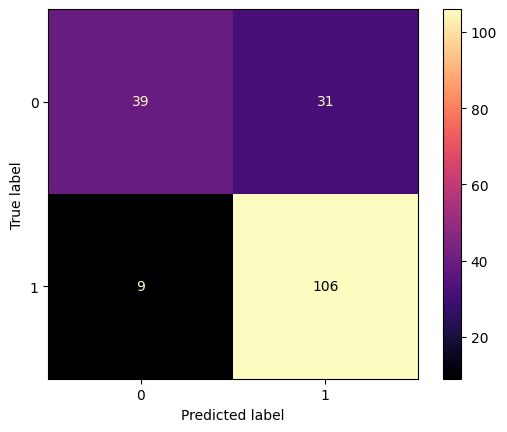

In [14]:
confusion_matrix_display,report= model_performance(y_test_pred, y_test)

The confusion matrix and classification report provide a comprehensive view of the model's performance. 

The confusion matrix shows a substantial number of correct predictions, with 108 true positives (correctly predicted 'closed') and 40 true negatives (correctly predicted 'acquired'). 

However, there are also 30 false positives and 7 false negatives, indicating areas where the model may be improved.

The classification report gives us precision, recall, and F1 scores for a more detailed analysis. The 'acquired' status has a high precision but lower recall, indicating that while most predictions of a startup being acquired are correct.

The overall accuracy is 0.80, which, along with a weighted average F1 score of 0.79, demonstrates the model's good performance, albeit with room for improvement in distinguishing between the two outcomes.

####  **Conclusion**

Selecting an algorithm for a particular problem isn't a matter of personal preference or subjectivity; rather, it's an objective process that becomes more manageable with experience.

A crucial aspect of this process is the comparison of different models. By evaluating performance, generalization ability, interpretability, computational efficiency, and robustness, we've identified the most suitable model for our predictive task. Through stages such as data preparation, segmentation, model training, and evaluation, we've laid the groundwork for a predictive framework.

Based on our evaluation metrics, such as Test Accuracy: 0.8, we have achieved a promising level of predictive performance. However, there is room for improvement. By analyzing errors and identifying recurring patterns in the data, we can refine our model further. This iterative process allows us to enhance the model's accuracy and effectiveness in predicting startup success.



#### Saving and Loading Machine Learning Models with joblib in Python ####

Once a model is trained and optimized, it's essential to save its state for future use or deployment.

- The joblib library is a powerful tool for efficiently handling large NumPy arrays and is commonly used in the machine learning community for saving and loading models.

In [15]:
#Remember to re-run the saving and loading code whenever you make significant changes 
#to your model and want to persist those changes.

import joblib
# Defining the File Path
# we set the file path where we intend to save and later load our machine learning model. 
# The chosen file path is '../data/best_model.joblib', indicating that the model will be saved in the 'data' directory.
file_path = '../saved_model/best_model.joblib'

# Save the entire model
joblib.dump(best_random_forest_model, file_path)
# Load the entire model
# The joblib.load function is used to load the serialized model from the file specified by file_path.
# The loaded model is then assigned to the variable loaded_model, making it ready for further use.
loaded_model = joblib.load(file_path)